<a href="https://colab.research.google.com/github/ssvadla/Legal_Text_Classification/blob/main/Supervised_allData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

#Read all the train data
train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [ ]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  train = train.append(i)



In [ ]:
new_train = train.drop_duplicates(subset ="Sentence")


In [ ]:
train = new_train

In [ ]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Others',
       'Conclusion', 'Issue'], dtype=object)

In [ ]:
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()


array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [ ]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [ ]:
#Test data preprocessing

test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')
test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=660 (14.946%)
Class=5, n=332 (7.518%)
Class=2, n=2253 (51.019%)
Class=0, n=677 (15.331%)
Class=1, n=225 (5.095%)
Class=4, n=269 (6.091%)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


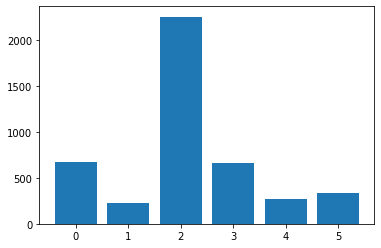

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm
from xgboost import XGBClassifier

X, y = make_classification(random_state=1)
X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.26,random_state=42)
#classifier = RandomForestClassifier(n_estimators = 350, criterion = 'gini', random_state = 42)
#classifier = lgb.LGBMClassifier()
#classifier = svm.SVC(decision_function_shape='ovo')
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
Accuracy_score = accuracy_score(y_pred,y_val)
print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Accuracy test data', acc_test)
classification_report = classification_report(test_pred,test['Target'],digits=4)
print(classification_report)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)


Validation Accuracy_score: 0.616188
Accuracy test data 0.5988483685220729
                  precision    recall  f1-score   support

        Analysis     0.1818    0.5185    0.2692        27
      Conclusion     0.4231    0.8462    0.5641        13
           Facts     0.9700    0.5982    0.7400       433
         Invalid     0.1807    0.6250    0.2804        24
           Issue     0.1471    0.7143    0.2439         7
Rule/Law/Holding     0.2353    0.4706    0.3137        17

        accuracy                         0.5988       521
       macro avg     0.3563    0.6288    0.4019       521
    weighted avg     0.8441    0.5988    0.6695       521

[[ 43  10  16   7   5   6]
 [  4  19   0   0   0   1]
 [123  33 560 114  36  52]
 [  2   0   4  41   2   6]
 [  3   0   2   0  22   1]
 [  3   0   2   2   7  23]]
